# RAG (Retrieval Augmented Generation ) 

In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution.

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc).

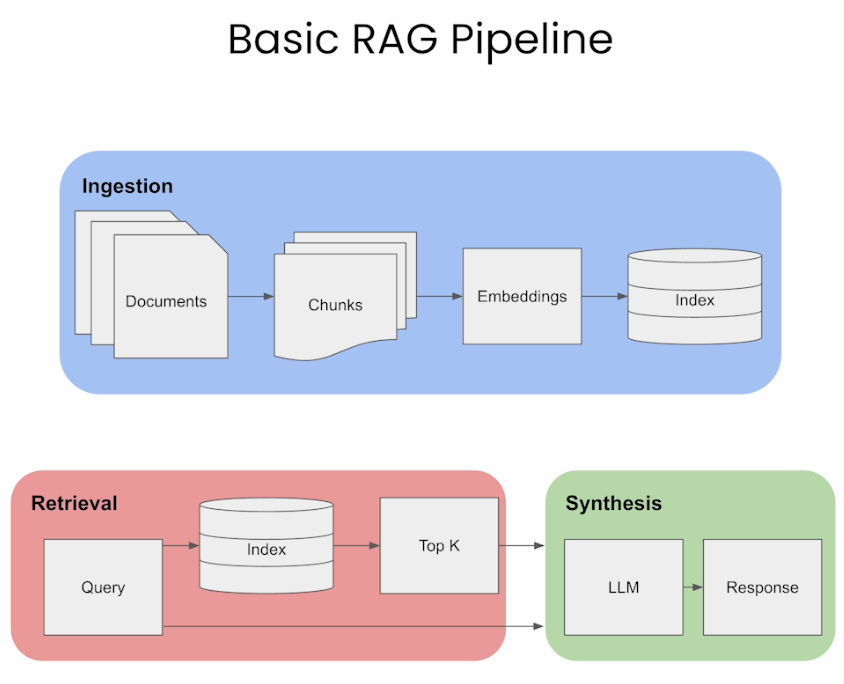

# Focus on Ingestion - Document Loading

## LangChain
LangChain is a powerful framework designed for building applications that leverage language models. 
It offers an extensive suite of tools and capabilities for integrating various NLP models and services, enabling developers to create sophisticated language-based applications efficiently.

* Key Features: LangChain provides modular components that allow for easy customization and extension.
* Use Cases: LangChain is ideal for a wide range of applications such as chatbots, virtual assistants, automated content creation, and sentiment analysis.

### Document Loading
* The process of ingesting documents into a system for further processing.
* Supported Formats: Includes plain text, HTML, docs, PDF, and more.
* Techniques : Use of specific loaders for different formats, handling large documents, and maintaining document integrity.



in LangChain, a Document is a simple structure with two fields:
* page_content (string): This field contains the raw text of the document.
* metadata (dictionary): This field stores additional metadata about the text, such as the source URL, author, or any other relevant information.

#### Types of loader 
Transform Loaders: These loaders handle different input formats and transform them into the Document format. For instance, consider a CSV file named "data.csv" with columns for "name" and "age". Using the CSVLoader, you can load the CSV data into Documents


Public Dataset or Service Loaders: LangChain provides loaders for popular public sources, allowing quick retrieval and creation of Documents. For example, the WikipediaLoader can load content from Wikipedia:

Proprietary Dataset or Service Loaders: These loaders are designed to handle proprietary sources that may require additional authentication or setup. For instance, a loader could be created specifically for loading data from an internal database or an API with proprietary access.

In [2]:
pip install langchain langchain-community

Note: you may need to restart the kernel to use updated packages.


### Loaders
Loaders are components in LangChain designed to ingest and preprocess data from various sources, preparing it for use with language models.
* Data Sources: Loaders can handle multiple types of data sources including text files, web pages, APIs, databases, and more.
* Preprocessing: They perform necessary preprocessing steps such as tokenization, normalization, and format conversion to ensure data is in the optimal state for model consumption.
* Customization: Loaders can be customized to handle specific data formats and preprocessing requirements, providing flexibility to suit different application needs.
* Integration: They seamlessly integrate with other LangChain components, streamlining the workflow from data ingestion to model deployment.

### 1. Text file loader
* The simplest loader reads in a file as text and places it all into one document.
* metadata :  source , page_content 

In [13]:
from langchain.document_loaders import TextLoader
loader=TextLoader('different_docs/info.txt')
loader.load()

[Document(metadata={'source': 'different_docs/info.txt'}, page_content='Hey , we are learning about document loader today')]

### 2. csv file loader
* Load CSV data with a single row per document.
* metadata :  source , row number , load single rows each time wise





In [14]:
from langchain.document_loaders import CSVLoader
loader=CSVLoader('different_docs/Details.csv')
loader.load()

[Document(metadata={'source': 'different_docs/Details.csv', 'row': 0}, page_content='Order ID: B-25681\nAmount: 1096\nProfit: 658\nQuantity: 7\nCategory: Electronics\nSub-Category: Electronic Games\nPaymentMode: COD'),
 Document(metadata={'source': 'different_docs/Details.csv', 'row': 1}, page_content='Order ID: B-26055\nAmount: 5729\nProfit: 64\nQuantity: 14\nCategory: Furniture\nSub-Category: Chairs\nPaymentMode: EMI'),
 Document(metadata={'source': 'different_docs/Details.csv', 'row': 2}, page_content='Order ID: B-25955\nAmount: 2927\nProfit: 146\nQuantity: 8\nCategory: Furniture\nSub-Category: Bookcases\nPaymentMode: EMI'),
 Document(metadata={'source': 'different_docs/Details.csv', 'row': 3}, page_content='Order ID: B-26093\nAmount: 2847\nProfit: 712\nQuantity: 8\nCategory: Electronics\nSub-Category: Printers\nPaymentMode: Credit Card'),
 Document(metadata={'source': 'different_docs/Details.csv', 'row': 4}, page_content='Order ID: B-25602\nAmount: 2617\nProfit: 1151\nQuantity: 4\n

### 3. PDF loader
Load PDF using pypdf into array of documents, where each document contains the page content and metadata with page number.
* metadata : source,page no, pagecontent

In [22]:
from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader("different_docs/book.pdf")
pages = loader.load_and_split()
pages

[Document(metadata={'source': 'different_docs/book.pdf', 'page': 2}, page_content='Aurélien GéronHands-on Machine Learning with\nScikit-Learn, Keras, and\nTensorFlow\nConcepts, Tools, and Techniques to\nBuild Intelligent SystemsSECOND EDITION\nBoston Farnham Sebastopol Tokyo Beijing Boston Farnham Sebastopol Tokyo Beijing'),
 Document(metadata={'source': 'different_docs/book.pdf', 'page': 3}, page_content='978-1-492-03264-9\n[LSI]Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow\nby Aurélien Géron\nCopyright © 2019 Aurélien Géron. All rights reserved.\nPrinted in the United States of America.\nPublished by O’Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472.\nO’Reilly books may be purchased for educational, business, or sales promotional use. Online editions are\nalso available for most titles ( http://oreilly.com ). For more information, contact our corporate/institutional\nsales department: 800-998-9938 or corporate@oreilly.com .\nEditor:  Nico

### 4. Docs Loader
convert document into text files and then load that file
* metadata : source, page_content

In [3]:
pip install docx2txt

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3972 sha256=5c45208188947e5552b4bfc05c39b697164633c540dc4f6a91cf91023b051fa2
  Stored in directory: c:\users\bashi\appdata\local\pip\cache\wheels\6f\81\48\001bbc0109c15e18c009eee300022f42d1e070e54f1d00b218
Successfully built docx2txt
Note: you may need to restart the kernel to use updated packages.


In [4]:
from langchain_community.document_loaders import Docx2txtLoader
loader=Docx2txtLoader("different_docs/fyp.docx")
loader.load()

[Document(metadata={'source': 'different_docs/fyp.docx'}, page_content='PhysioFlex-personal Posture Trainer\n\n\n\n\n\n\n\nBy\n\n\n\nHamza Akram         \n\n20-ARID-763\n\nM Fahad Bashir       \n\n20-ARID-790\n\nSyeda Moniza          \n\n 20-ARID-833\n\n\n\nSupervisor\nDr. Ruqia Bibi\n\n\n\nUniversity Institute of Information Technology,\n\nPMAS-Arid Agriculture University,\n\nRawalpindi \n\n2024\n\nBachelor of Science in Software Engineering (2020-2024)\n\n\n\n\n\n\n\nThe candidate confirms that the work submitted is their own and appropriate\n credit has been given where reference has been made to the work of others.\n\n\n\nDECLARATION\n\n\n\nWe hereby declare that this software, neither whole nor as a part has been copied out from any source. It is further declared that we have developed this software documentation and accompanied report entirely on the basis of our personal efforts. If any part of this project is proved to be copied out from any source or found to be reproduction o

### 5 . PPT loader

In [4]:
pip install python-pptx



  Using cached python_pptx-1.0.2-py3-none-any.whl.metadata (2.5 kB)


In [6]:
from langchain.document_loaders import UnstructuredPowerPointLoader

# Replace with the path to your .pptx file
loader = UnstructuredPowerPointLoader("Lecture 36 Introduction to Langchain.pptx")

# Load the PowerPoint file and extract data
data = loader.load()

# Display the extracted data
data


[Document(metadata={'source': 'Lecture 36 Introduction to Langchain.pptx'}, page_content="Lecture 36\n\nHOPE TO SKILL\n\nIntroduction To\n\nLangChain & RAG\n\nArtificial Intelligence Advance Course \n\n\n\nDedicated to my late Teacher, a beacon of Knowledge.\n\nYour Guidance shaped me; now I shape others through \n\na free course.\n\nYOUR LEGACY LIVES ON!\n\n\n\n AI INSTRUCTORS\n\nDr.Irfan Malik\n\nDr.Sheraz Naseer\n\nRamsha Imran\n\nM.Haris Tariq\n\nDr.Shazia Saqib\n\n\n\n02\n\n03\n\n01\n\nBERT\n\nGPT\n\nTransformer Models\n\n\n\nOutline\n\nIntroduction to RAG \n\nIntroduction to Langchain\n\nDocument loading\n\n\n\nThe Challenge of Information Overload\n\nThe digital age has led to\n\nan explosion of information,\n\nmaking it difficult to find relevant\n\nand accurate data.\n\nA person is overwhelmed by a \n\nmountain of data.\n\n\n\nDifficulty in understanding user intent and context\n\n Traditional Search Limitations\n\n\n\nProblem with LLM\n\nIssue: LLMs, like GPT, may not have ac

### 5.URL 
it will load the content of page that's link is provided
* metadata : source,title,description,language

In [5]:
from langchain_community.document_loaders import WebBaseLoader
webloader=WebBaseLoader('https://mfahadbashir.hashnode.dev/')
webloader.load()

USER_AGENT environment variable not set, consider setting it to identify your requests.


[Document(metadata={'source': 'https://mfahadbashir.hashnode.dev/', 'title': "Muhammad Fahad's Blog", 'description': "Muhammad Fahad's Blog", 'language': 'en'}, page_content="Muhammad Fahad's BlogMuhammad Fahad's BlogMuhammad Fahad's BlogFollowFollowhomebadgesnewsletter1. What is RAG? A Deep Dive into Retrieval-Augmented Generation for AIAug 25, 20244 min read38 viewsIn the rapidly evolving world of artificial intelligence, a term that has gained significant attention in the last couple of years is RAG, which...1. Building and Deploying a Real-Time Voice-to-Voice Chatbot: The Journey of VoiceBuddyAug 22, 20247 min read42 viewsGenerative AI is revolutionizing the tech landscape, enabling us to develop and deploy applications that were once unimaginable, prohibitively...Understanding How Computers See PicturesAug 12, 20244 min read21 viewsWhen I first learned how computers interpret images, I was amazed by the process. It's something we often take for granted, but understanding it can...

### 6.HTML ( hyper text markup language)
an HTML page either directly from a saved HTML page or a URL

In [8]:
pip install unstructured


  Using cached unstructured-0.15.7-py3-none-any.whl.metadata (29 kB)
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached emoji-2.12.1-py3-none-any.whl.metadata (5.4 kB)
  Using cached python_iso639-2024.4.27-py3-none-any.whl.metadata (13 kB)
  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached rapidfuzz-3.9.6-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached unstructured_client-0.25.5-py3-none-any.whl.metadata (13 kB)
  Using cached deepdiff-7.0.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached jsonpath_python-1.0

In [2]:
from langchain_community.document_loaders import UnstructuredHTMLLoader
from langchain_community.document_loaders import UnstructuredURLLoader

loader = UnstructuredURLLoader(urls=['https://diataxis.fr'], mode='elements')
data = loader.load()
data

[Document(metadata={'category_depth': 0, 'link_texts': ['Diátaxis'], 'link_urls': ['#'], 'languages': ['eng'], 'filetype': 'text/html', 'url': 'https://diataxis.fr', 'category': 'Title'}, page_content='Diátaxis'),
 Document(metadata={'category_depth': 1, 'link_texts': ['Home'], 'link_urls': ['#'], 'languages': ['eng'], 'parent_id': 'a21eff4906b1c28e853ef294f8067e04', 'filetype': 'text/html', 'url': 'https://diataxis.fr', 'category': 'ListItem'}, page_content='Home'),
 Document(metadata={'category_depth': 1, 'link_texts': ['Applying Diátaxis'], 'link_urls': ['application/'], 'languages': ['eng'], 'parent_id': 'a21eff4906b1c28e853ef294f8067e04', 'filetype': 'text/html', 'url': 'https://diataxis.fr', 'category': 'ListItem'}, page_content='Applying Diátaxis'),
 Document(metadata={'category_depth': 1, 'link_texts': ['Tutorials'], 'link_urls': ['tutorials/'], 'languages': ['eng'], 'parent_id': 'a21eff4906b1c28e853ef294f8067e04', 'filetype': 'text/html', 'url': 'https://diataxis.fr', 'categor

### 7.YouTube
If you want the summary of a YouTube video or want to search through its transcript, this is the loader you need. Make sure you use the video_id not the entire URL, as shown below

In [2]:
pip install youtube-transcript-api pytube

Note: you may need to restart the kernel to use updated packages.


In [4]:

from langchain_community.document_loaders import YoutubeLoader

video_url = 'https://www.youtube.com/watch?v=LKCVKw9CzFo'
loader = YoutubeLoader(video_id='LKCVKw9CzFo', add_video_info=True)
data = loader.load()
data

[Document(metadata={'source': 'LKCVKw9CzFo', 'title': '100+ Linux Things you Need to Know', 'description': 'Unknown', 'view_count': 1038195, 'thumbnail_url': 'https://i.ytimg.com/vi/LKCVKw9CzFo/hq720.jpg', 'publish_date': '2024-07-06 00:00:00', 'length': 742, 'author': 'Fireship'}, page_content="statistically 96% of the humans watching this video are not using Linux and that's just like really sad because it's a superior free open source operating system but only has a 4% share of the PC market luckily though 96% of the non-human Bots watching this video are using Linux because it is the dominant OS on the server if you're a programmer or developer you need to know Linux that's where your code will eventually run and fail and if you can't SSH into a Linux terminal and fix it you are screwed in today's video you'll learn everything you need to know about Linux by looking at 101 essential Concepts over the next 10 minutes if you survive until the end you should magically grow neck beard 

### 8. DirectoryLoader

In [12]:
%pip install libmagic

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4279 sha256=9aaedc9ac7b9ed167c151706cadae2298271d43cd46a476dcc22d1ebfdab7581
  Stored in directory: c:\users\bashi\appdata\local\pip\cache\wheels\ba\32\b5\da21074580720b7a55fbf1a7597e3b1a325d12940ea6bd661b
Successfully built libmagic
Note: you may need to restart the kernel to use updated packages.


In [1]:
from langchain_community.document_loaders import UnstructuredHTMLLoader
loader = UnstructuredHTMLLoader("hello.html")
data = loader.load()
data

[Document(metadata={'source': 'hello.html'}, page_content='The title Attribute\n\nMouse over this paragraph, to display the title attribute as a tooltip.')]